In [370]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
import numpy as np
import operator
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Reading Data 

In [371]:
data = pd.read_csv('../data/survey_results_public.csv')
data.head(5)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


## Data insights

In [372]:
data.describe()

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


### check missing data

In [373]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False).astype('int')
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data['Column_Name'] = missing_data.index

missing_data


,Total,Percent,Column_Name
TimeAfterBootcamp,92203,93,TimeAfterBootcamp
MilitaryUS,83074,84,MilitaryUS
HackathonReasons,73164,74,HackathonReasons
ErgonomicDevices,64797,65,ErgonomicDevices
AdBlockerReasons,61110,61,AdBlockerReasons
StackOverflowJobsRecommend,60538,61,StackOverflowJobsRecommend
JobEmailPriorities1,52642,53,JobEmailPriorities1
JobEmailPriorities2,52642,53,JobEmailPriorities2
JobEmailPriorities3,52642,53,JobEmailPriorities3
JobEmailPriorities4,52642,53,JobEmailPriorities4


#### Findings 
It seems that there is 19 Attributes have more than 50% of missing Data

### cleanup 
Map **Employment**, **FormalEducation**, **JobSearchStatus** and **Salary** to smaller readable values, that can be analysed

In [374]:

data['Student'] = data['Student'].fillna('unknown')
data["Country"] = data["Country"].fillna('unknown')
data["DevType"] = data["DevType"].fillna('unknown')

employment = {
    'Employed full-time': 'full-time',
    'Employed part-time': 'part-time',
    'Independent contractor, freelancer, or self-employed': 'self-employed',
    'Not employed, but looking for work': 'looking',
    'Not employed, and not looking for work': 'not-employed'
}

education = {
    "Professional degree (JD, MD, etc.)": "professional-degree",
    "Associate degree": "associate-degree",
    "Bachelor’s degree (BA, BS, B.Eng., etc.)": "bachelor-degree",
    "Master’s degree (MA, MS, M.Eng., MBA, etc.)": "master-degree",
    "Other doctoral degree (Ph.D, Ed.D., etc.)": "doctoral-degree",
    "Some college/university study without earning a degree": "collage",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "secondary-school",
    "Primary/elementary school": "elementary-school",
    "I never completed any formal education": "no-degree",

}

job_search_tatus = {
    'I am actively looking for a job': 'yes',
    'I’m not actively looking, but I am open to new opportunities':'open',
    'I am not interested in new job opportunities': 'no'
}

data['Employment'].replace(employment, inplace=True)
data["Employment"].fillna("unknown",inplace=True)

data["FormalEducation"].replace(education, inplace=True)
data["FormalEducation"].fillna("unknown", inplace=True)

data['JobSearchStatus'].replace(job_search_tatus,inplace=True)
data["JobSearchStatus"].fillna("unknown", inplace=True)

data["TimeAfterBootcamp"][data["TimeAfterBootcamp"] == "I already had a full-time job as a developer when I began the program"] = "Already had a job"

data['Salary'] = pd.to_numeric(data['Salary'], errors='coerce')


def fix_salary(sal):
    if sal is np.nan:
        return 'unknown'
    if sal < 10000: 
        return '<10K'
    elif sal < 50000:
        return '<50K'
    elif sal < 100000:
        return '<100K'
    elif sal < 150000:
        return '<150K'
    elif sal < 200000:
        return '<200K'
    else:
        return '>200K'

data['Salary_norm'] = data['Salary'].apply(fix_salary)
    
data.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,Salary_norm
0,1,Yes,No,Kenya,No,part-time,bachelor-degree,Mathematics or statistics,20 to 99 employees,Full-stack developer,...,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy,>200K
1,3,Yes,Yes,United Kingdom,No,full-time,bachelor-degree,"A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,<100K
2,4,Yes,Yes,United States,No,full-time,associate-degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>200K
3,5,No,No,United States,No,full-time,bachelor-degree,"Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy,>200K
4,7,Yes,No,South Africa,"Yes, part-time",full-time,collage,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,>200K


In [375]:
def clean_view(column: str, mapped_column:str, df = None):
    """
    clean the list of values that is seprerated by ; to be able to count them and process them in some column
    :param column: the column name that needs to be filtered
    :param mapped_column: the column name that it used to map the original column
    :param df DataFrame that is going to be processed
    return a dataframe that has two columns: mapped_column, count
    """
    if df is None:
        counts = countries_data_df[column].dropna().str.split(';').map(Counter).sum()
        series = pd.Series(counts, name='count')
        series = series.rename_axis([mapped_column])
        counts_df = pd.DataFrame(series)
        counts_df.reset_index(inplace=True)
        counts_df.sort_values(inplace=True, by=['count'], ascending=False)
        return counts_df
    else:
        counts = df[column].dropna().str.split(';').map(Counter).sum()
        series = pd.Series(counts, name='count')
        series = series.rename_axis([mapped_column])
        counts_df = pd.DataFrame(series)
        counts_df.reset_index(inplace=True)
        counts_df.sort_values(inplace=True, by=['count'], ascending=False)
        return counts_df

## Data analysis

### Top 15 countries 

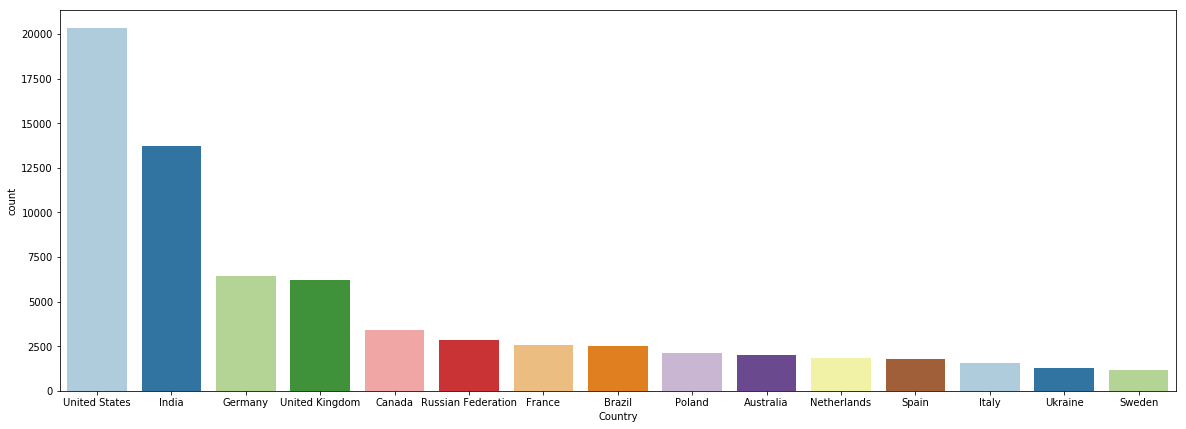

In [325]:
top_countries = data.Country.value_counts()
top_15_countries = top_countries.head(15)

countries = list(top_15_countries.index)

plt.subplots(figsize=(20,7))
sns.countplot(x = data.Country, order = top_15_countries.index, palette='Paired')

In [223]:
#  filter for the top countries
countries_data_df = data[data['Country'].isin(countries)]
countries_data_df.shape

(69777, 130)

#### Findings
Consider the top 15 countries for analysis from now on as they are the biggest contributers for the survey on the other hand they belong to different continents, which gives us enough diversity

### Employment 
Lets check what employment categories we have

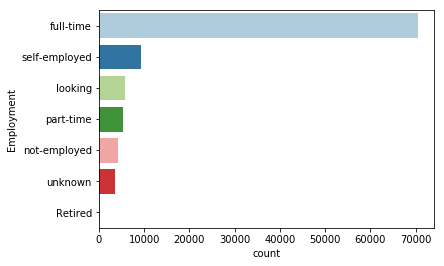

In [201]:
sns.countplot(y=data.Employment, order = countries_data_df.Employment.value_counts().index, palette='Paired')

#### Findings
The major contributers have a full time job

### Hobbies in terms of Open Source contribution and Employment
Let's see if how much is doing coding as hobby or contrinuting to open source project, and then check their agains employment status 

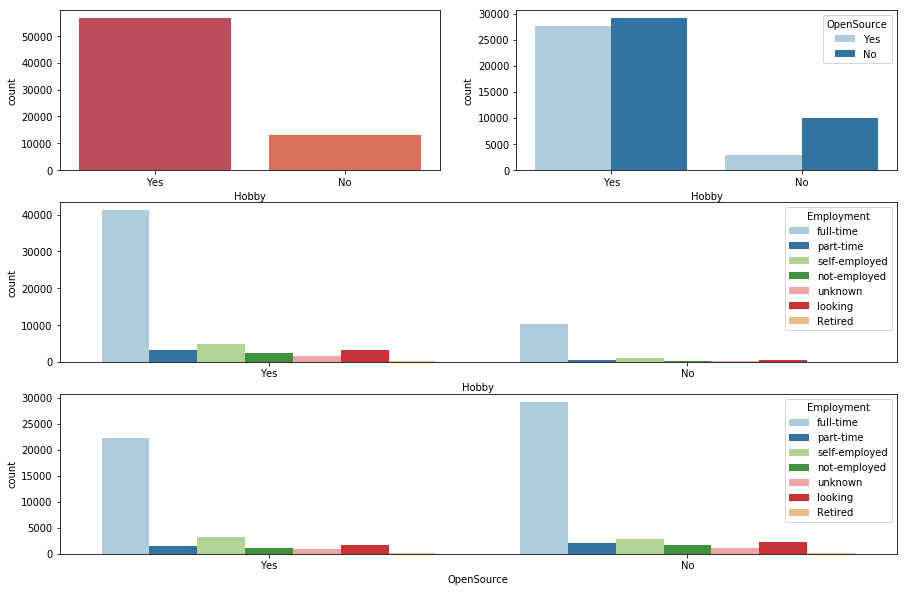

In [376]:
gs = gridspec.GridSpec(3, 2)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
sns.factorplot("Hobby",data=countries_data_df,kind="count",ax=ax1,palette=sns.color_palette("Spectral", 10))

ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
sns.factorplot("Hobby",data=countries_data_df, kind="count",ax=ax2,hue="OpenSource",palette=sns.color_palette("Paired", 10))

ax3 = fig.add_subplot(gs[1, :]) # row 1, span all columns
sns.factorplot("Hobby",data=countries_data_df,kind="count",ax=ax3,hue="Employment",palette=sns.color_palette("Paired", 10))

ax4 = fig.add_subplot(gs[2, :]) # row 2, span all columns
sns.factorplot("OpenSource",data=countries_data_df,kind="count",ax=ax4,hue="Employment",palette=sns.color_palette("Paired", 10))

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)

#### Findings
Most of the people they are doing development as hobby out of which almost 50% 50% between contributing to Open source projects. but we could notice that the people who is not doing development as hobby they tend to contribute less to open about 60% less.

On the other hand you have more full timers not contributing to open source projects than contributing.


### Students vs Employment
Lets see student type vs Hobby and open source contribution relation

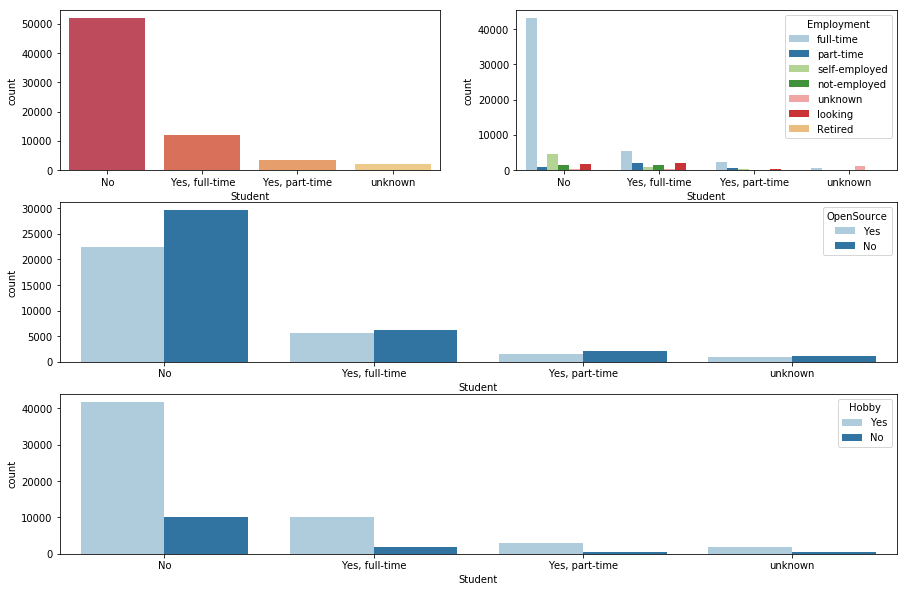

In [377]:
gs = gridspec.GridSpec(3, 2)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
sns.factorplot("Student",data=countries_data_df,kind="count",ax=ax1,palette=sns.color_palette("Spectral", 10))

ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
sns.factorplot("Student",data=countries_data_df, kind="count",ax=ax2,hue="Employment",palette=sns.color_palette("Paired", 10))

ax3 = fig.add_subplot(gs[1, :]) # row 1, span all columns
sns.factorplot("Student",data=countries_data_df,kind="count",ax=ax3,hue="OpenSource",palette=sns.color_palette("Paired", 10))

ax4 = fig.add_subplot(gs[2, :]) # row 2, span all columns
sns.factorplot("Student",data=countries_data_df,kind="count",ax=ax4,hue="Hobby",palette=sns.color_palette("Paired", 10))

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)

#### Findings
Full time Studens tend to develop as hobby more than they are contributing to open source, while the majority of full time students are working full time or part time jobs

### Specialties
check what is the most demanding specialities out there

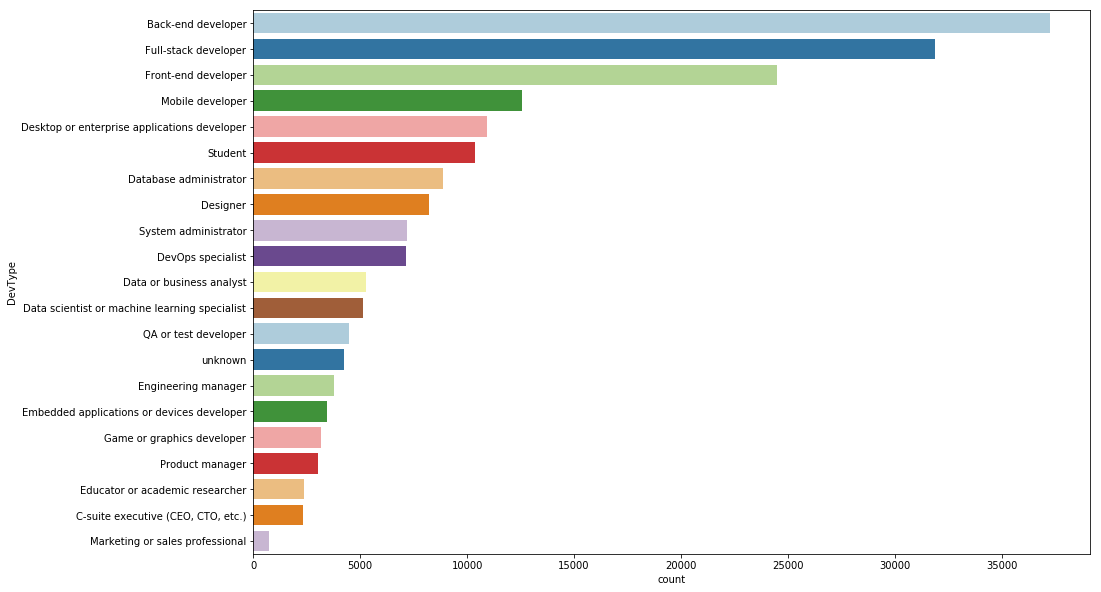

In [378]:
roles_df = clean_view('DevType', 'DevType')
plt.figure(figsize=(15,10))
sns.barplot(x=roles_df['count'], y=roles_df['DevType'], palette='Paired')

#### Findings
It seems the top highest fields is Backend, Full stack, Frontend Development

### Languages used
lets see who is is the usage per language and which ones are the highest

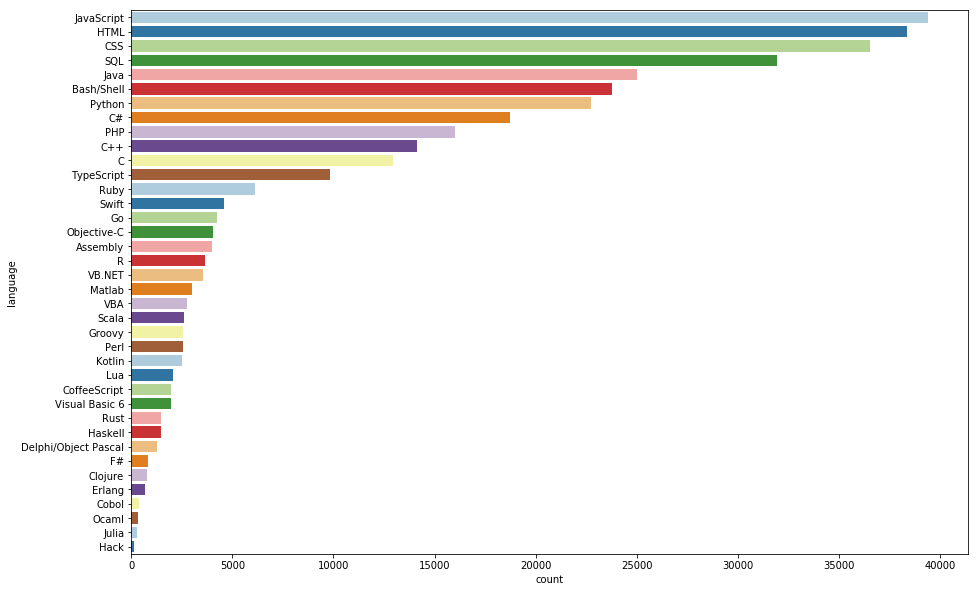

In [205]:
languages_df = clean_view('LanguageWorkedWith', 'language')
plt.figure(figsize=(15,10))
sns.barplot(x=languages_df['count'], y=languages_df['language'], palette='Paired')

#### Findings
Javascrip is has the highest usage not far beyond HTML and CSS, which proves the findings before as Backend, Fullstack and Frontend needs to know Javascript , HTML and CSS

### Languages desired to learn
What is the languages that is desire to lean by next year

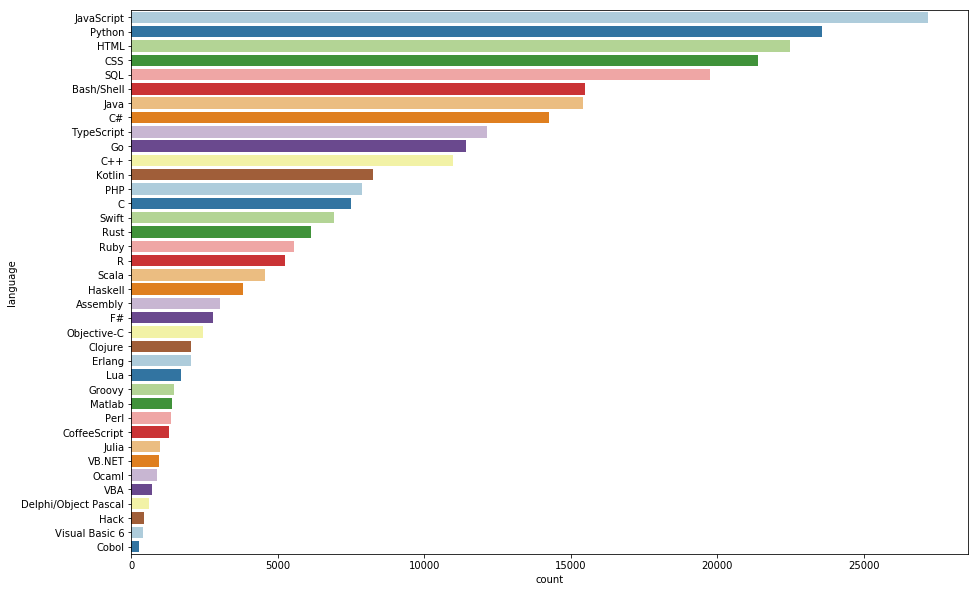

In [206]:
languages_desired_df = clean_view('LanguageDesireNextYear', 'language')
plt.figure(figsize=(15,10))
sns.barplot(x=languages_desired_df['count'], y=languages_desired_df['language'], palette='Paired')

#### Findings
It seems that Javascript and python is on the top of most of wish lists 

### Most used databases
What is the most used Databases

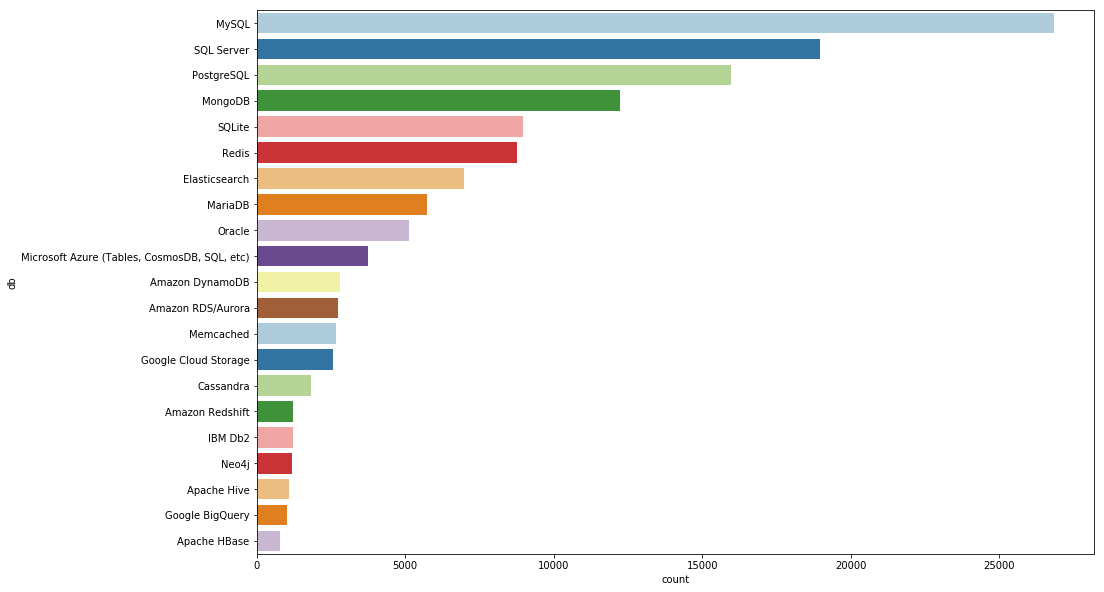

In [207]:
db_df = clean_view('DatabaseWorkedWith', 'db')
plt.figure(figsize=(15,10))
sns.barplot(x=db_df['count'], y=db_df['db'], palette='Paired')

#### Findings
MySQL is the heightist used language 

### Databases wish to use
What database is whished to be learned by next year

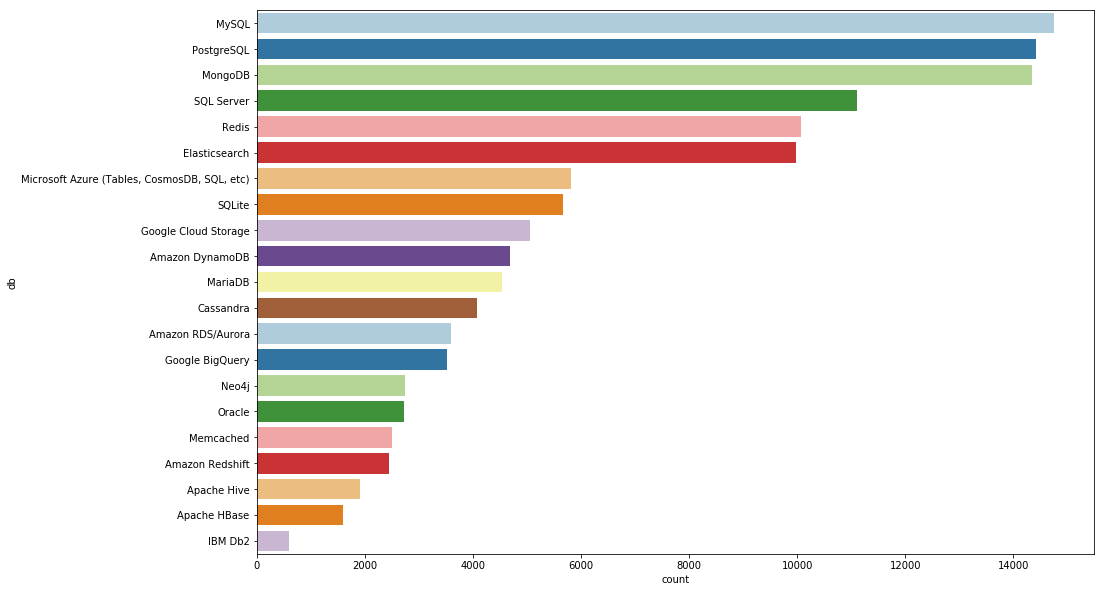

In [208]:
db_desired_df = clean_view('DatabaseDesireNextYear', 'db')
plt.figure(figsize=(15,10))
sns.barplot(x=db_desired_df['count'], y=db_desired_df['db'], palette='Paired')

#### Findings
MySQL still have the lead share while PostgreSQL and MongoDB not far behind

### Most used frameworks
What is the most used frameworks

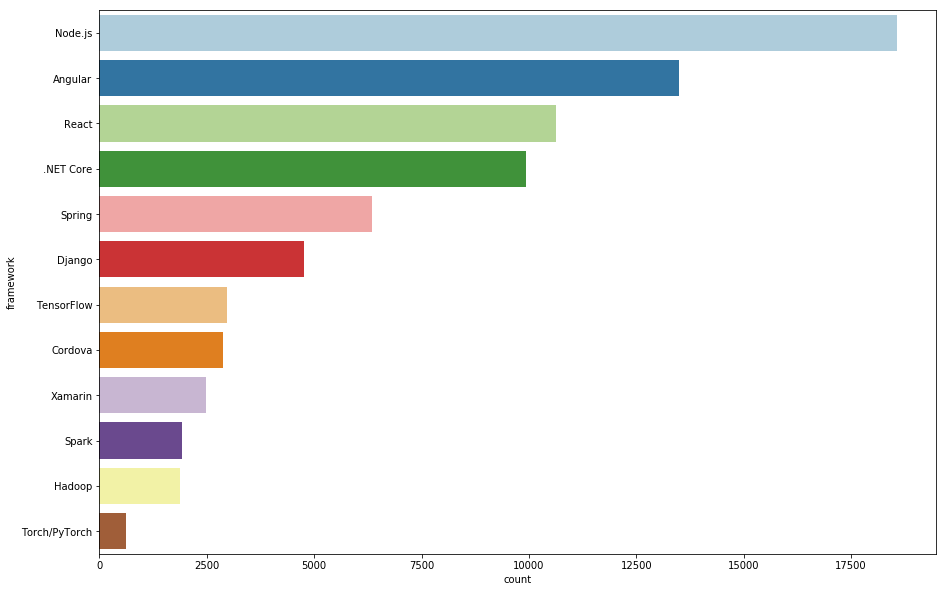

In [209]:
frameworks_df = clean_view('FrameworkWorkedWith', 'framework')
plt.figure(figsize=(15,10))
sns.barplot(x=frameworks_df['count'], y=frameworks_df['framework'], palette='Paired')

#### Findings
Javascript Frameworks are most used frameworks

### Years of coding
How many years of coding usually people have on Stack Overflow

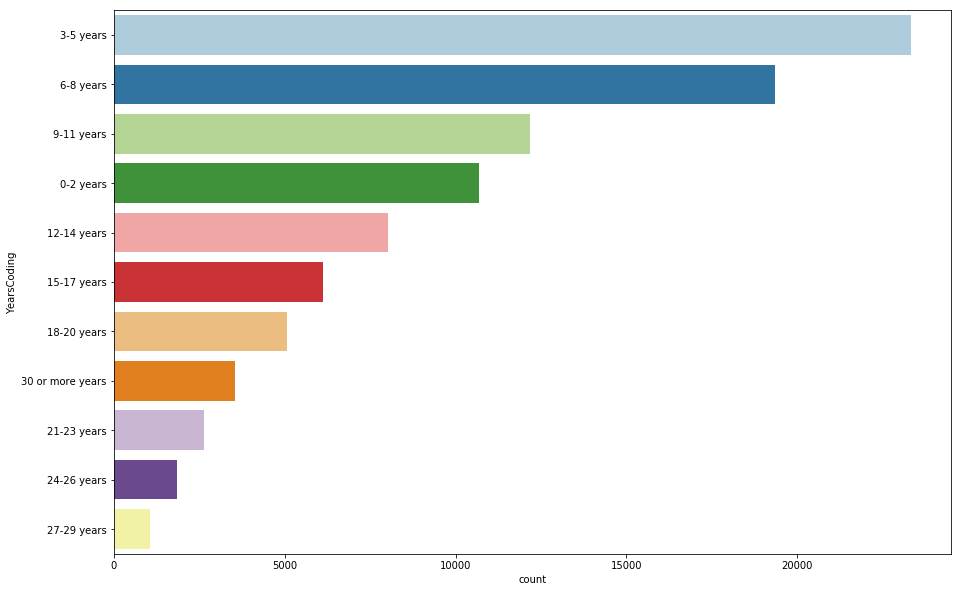

In [379]:
plt.figure(figsize=(15,10))
sns.countplot(y = data.YearsCoding, order = data.YearsCoding.value_counts().index, palette='Paired')

#### Findings
3-5 years is in the top, which makes sense as alot of people learn from stack overflow

### Satisfaction
what is the career satisfaction level among the contributers

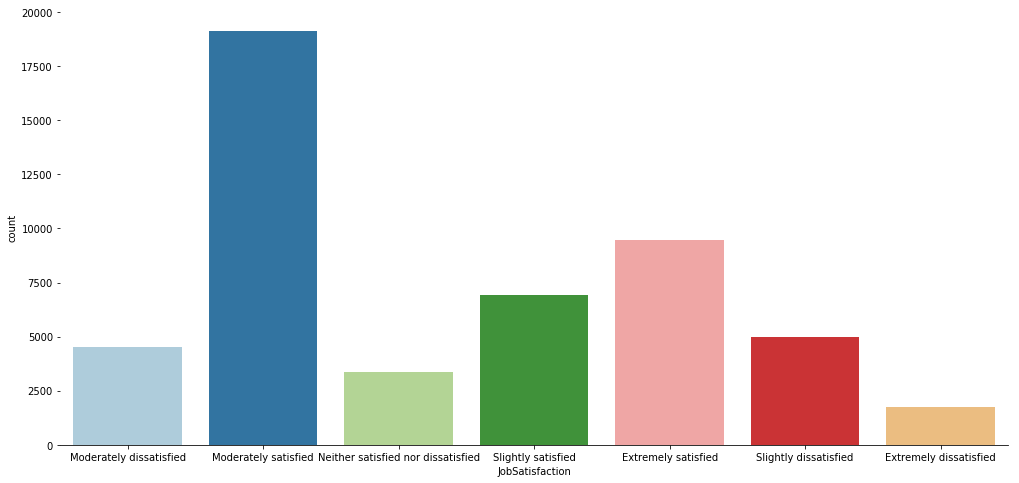

In [211]:
plt.figure(figsize=(17, 8))
sns.countplot(data=countries_data_df, x='JobSatisfaction', palette='Paired')
sns.despine(left=True)

#### Findings
Most of the people are Moderately satisfied

### Satisfaction per country
what about the Satisfaction per country any difference to be noticed

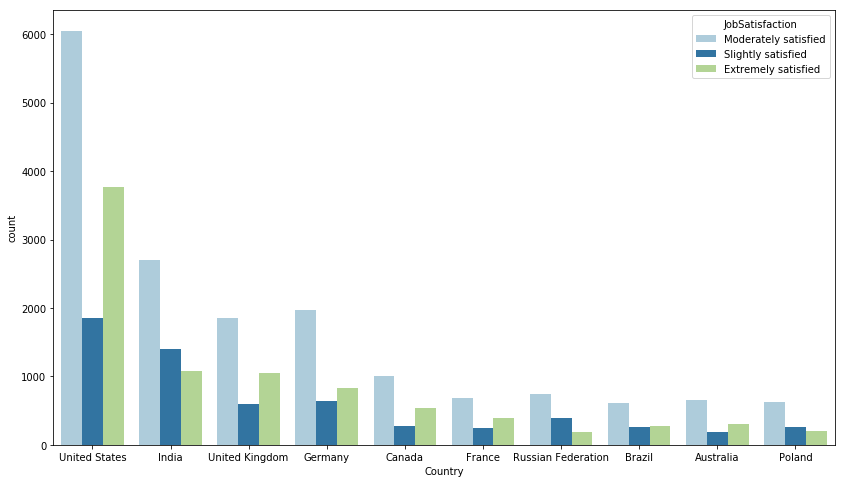

In [380]:

sat = countries_data_df[np.logical_or(np.logical_or(countries_data_df['JobSatisfaction'] == 'Moderately satisfied', countries_data_df['JobSatisfaction'] == 'Extremely satisfied'), countries_data_df['JobSatisfaction'] == 'Slightly satisfied')]

plt.figure(figsize=(14, 8))
sns.countplot(data=sat, x='Country', hue='JobSatisfaction', palette='Paired', order=sat['Country'].value_counts()[:10].index)


#### Findings
Apperantly not, Most are Moderately satisfied

### Wake up times
What about the daily habbits. eg Wakeup times

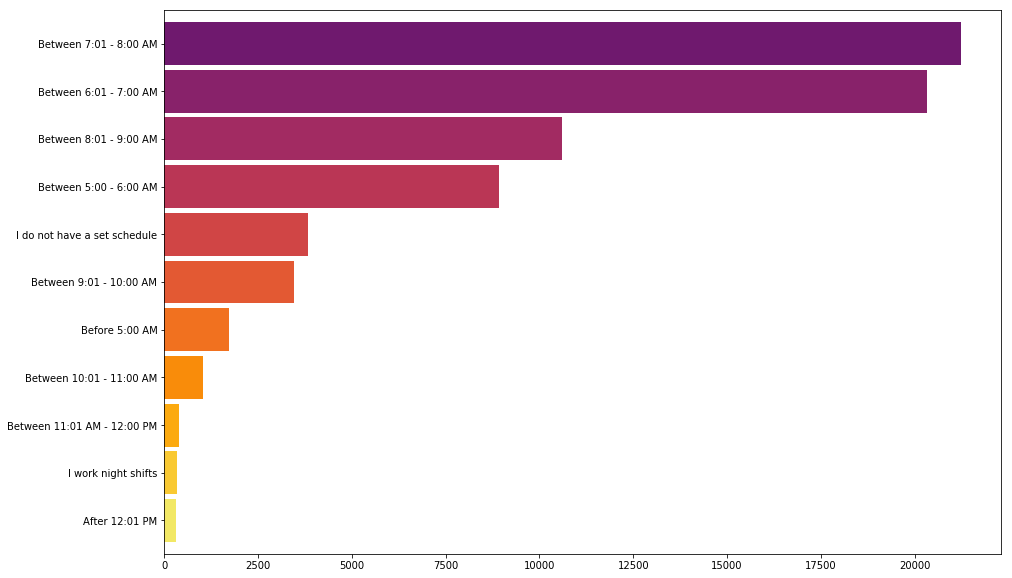

In [213]:
plt.figure(figsize=(15,10))
data.WakeTime.value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno_r',15))

#### Findings
Most people wakeup between 6-8 AM

### wake up times per country
what about wake up per country is it different from above findings

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

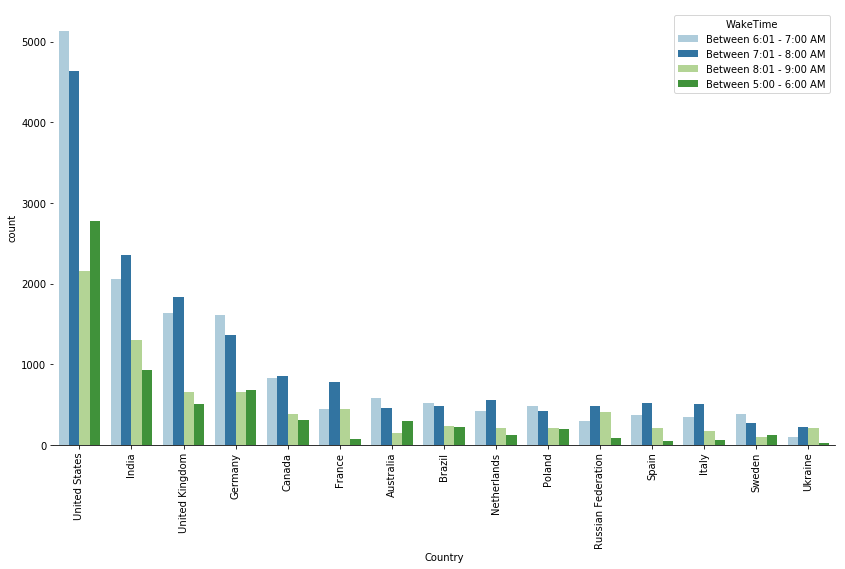

In [214]:
early = countries_data_df[
    np.logical_or(np.logical_or(np.logical_or(
        countries_data_df['WakeTime'] == 'Between 7:01 - 8:00 AM', 
        countries_data_df['WakeTime'] == 'Between 6:01 - 7:00 AM'
    ), countries_data_df['WakeTime'] == 'Between 5:00 - 6:00 AM'),  
       countries_data_df['WakeTime'] == 'Between 8:01 - 9:00 AM')] 

plt.figure(figsize=(14, 8))
sns.countplot(data=early, x='Country', hue='WakeTime', palette='Paired', order=early['Country'].value_counts().index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

#### Findings
Not really more or less the same between 6-8 AM

### Wake up time vs Satisfaction
Does wakeup times affects job satisfaction 

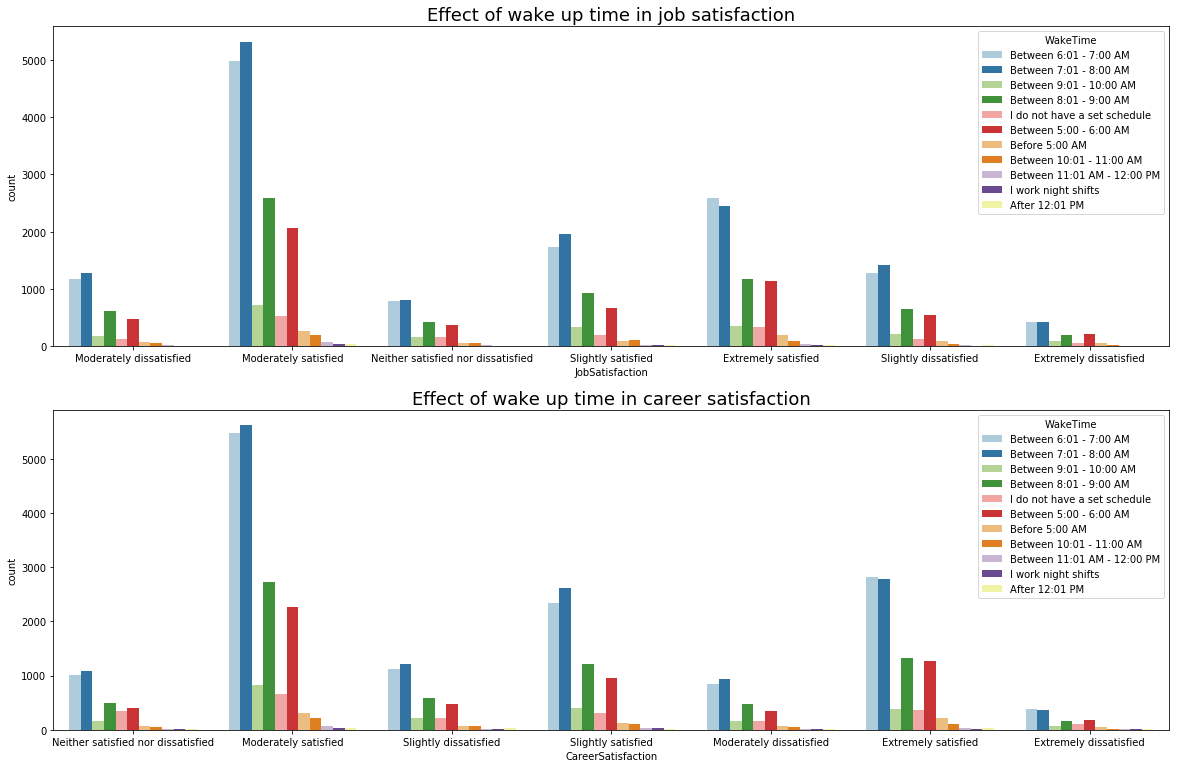

In [215]:
gs = gridspec.GridSpec(3, 1)
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(gs[0]) 
sns.factorplot(x="JobSatisfaction", kind="count",hue="WakeTime", data=countries_data_df, ax=ax1, palette='Paired')

ax2 = fig.add_subplot(gs[1])
sns.factorplot(x='CareerSatisfaction', kind="count", hue='WakeTime', data=countries_data_df, ax=ax2, palette='Paired')

ax1.set_title('Effect of wake up time in job satisfaction', fontsize=18)
ax2.set_title('Effect of wake up time in career satisfaction', fontsize=18)

plt.close(2)
plt.close(3)

#### Findings
Not really but one take away not the people who wakes up between 6-8am tend lean more toward Moderately or Extremely Satisfied

### Hours on computer per country
how many hours people tend to set behind computers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

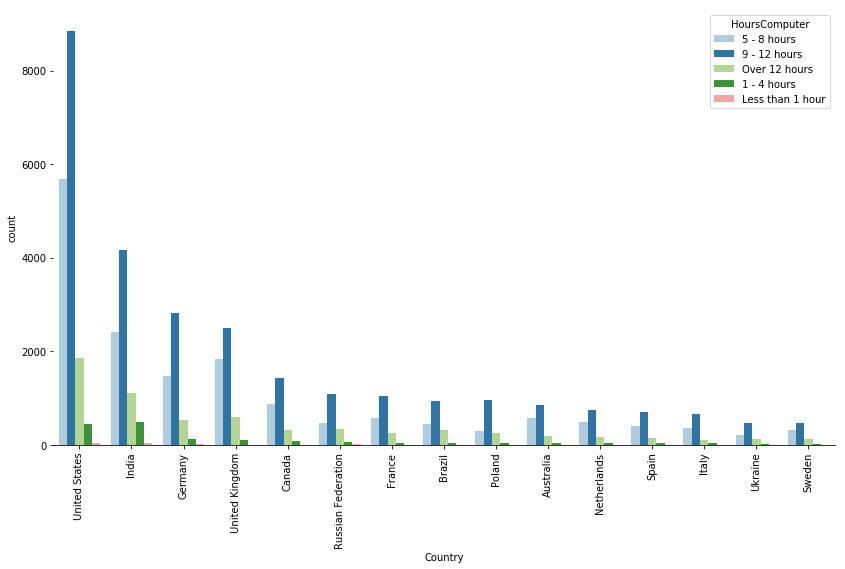

In [216]:
plt.figure(figsize=(14, 8))
sns.countplot(data=countries_data_df, x='Country', hue='HoursComputer', palette='Paired', order=countries_data_df['Country'].value_counts().index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

#### Findings
9-12 hours takes the lion share followed by 5-8 hours

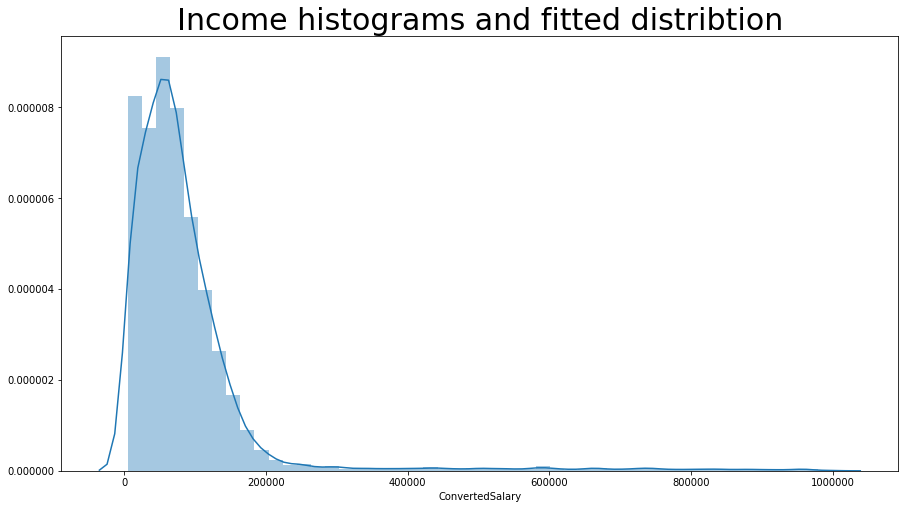

In [217]:
sal_dist = countries_data_df[(countries_data_df['ConvertedSalary']>5000) & (data['ConvertedSalary']<1000000)]

plt.subplots(figsize=(15,8))
sns.distplot(sal_dist['ConvertedSalary'])
plt.title('Income histograms and fitted distribtion',size=30)
plt.show();

In [218]:
print('The median salary of developers: {} USD'.format(sal_dist['ConvertedSalary'].median()))
print('The mean salary of developers: {:0.2f} USD'.format(sal_dist['ConvertedSalary'].mean()))

The median salary of developers: 65000.0 USD
The mean salary of developers: 86658.11 USD


### Male vs Female
Lets see if Male and Female are Equal 

#### Fix the data

In [363]:
countries_data_df[countries_data_df.Gender.isin(['Male','Female'])].head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,Salary_norm
1,3,Yes,Yes,United Kingdom,No,full-time,bachelor-degree,"A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,<100K
3,5,No,No,United States,No,full-time,bachelor-degree,"Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy,>200K
5,8,Yes,No,United Kingdom,No,full-time,bachelor-degree,"Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Database administrator;Fron...,...,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy,<50K
6,9,Yes,Yes,United States,No,full-time,collage,"Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,...,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,18 - 24 years old,No,No,The survey was an appropriate length,Somewhat easy,<150K
8,11,Yes,Yes,United States,No,full-time,collage,Fine arts or performing arts (ex. graphic desi...,100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO...",...,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,Yes,No,The survey was an appropriate length,Very easy,>200K


#### Plot different metrics for M vs F 

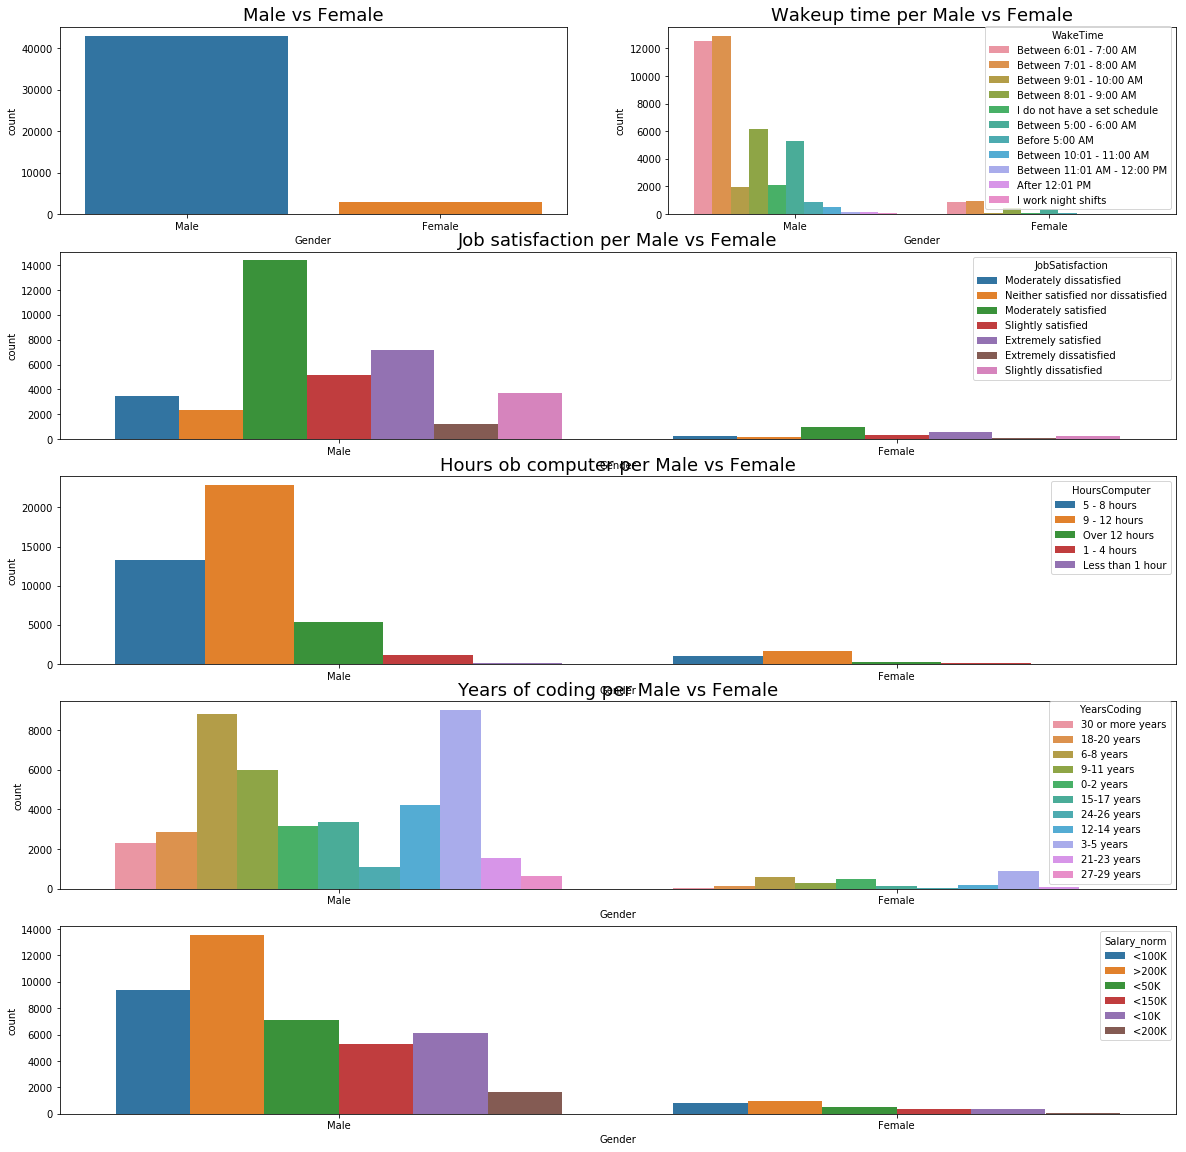

In [364]:
gender_filter=countries_data_df[countries_data_df.Gender.isin(['Male','Female'])]

gs = gridspec.GridSpec(5, 2)
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(gs[0,0]) 
sns.factorplot(x="Gender", kind="count", data=gender_filter, ax=ax1)

ax2 = fig.add_subplot(gs[0,1])
sns.factorplot(x='Gender', kind="count", hue='WakeTime', data=gender_filter, ax=ax2)

ax3 = fig.add_subplot(gs[1,:])
sns.factorplot(x='Gender', kind="count", hue='JobSatisfaction', data=gender_filter, ax=ax3)

ax4 = fig.add_subplot(gs[2,:])
sns.factorplot( x='Gender', kind="count", hue='HoursComputer', data=gender_filter, ax=ax4)

ax5 = fig.add_subplot(gs[3,:])
sns.factorplot(x='Gender',  kind="count",  hue='YearsCoding', data=gender_filter, ax=ax5)

ax6 = fig.add_subplot(gs[4,:])
sns.factorplot(x='Gender',  kind="count",  hue='Salary_norm', data=gender_filter, ax=ax6)

ax1.set_title('Male vs Female', fontsize=18)
ax2.set_title('Wakeup time per Male vs Female', fontsize=18)
ax3.set_title('Job satisfaction per Male vs Female', fontsize=18)
ax4.set_title('Hours ob computer per Male vs Female', fontsize=18)
ax5.set_title('Years of coding per Male vs Female', fontsize=18)

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)

#### Findings
1. The ammount of contributers in the survey are mostly males
2. wakeup times , job satisfaction, hours behind computer and Salary is almost the same among both

#### Salaries M vs F

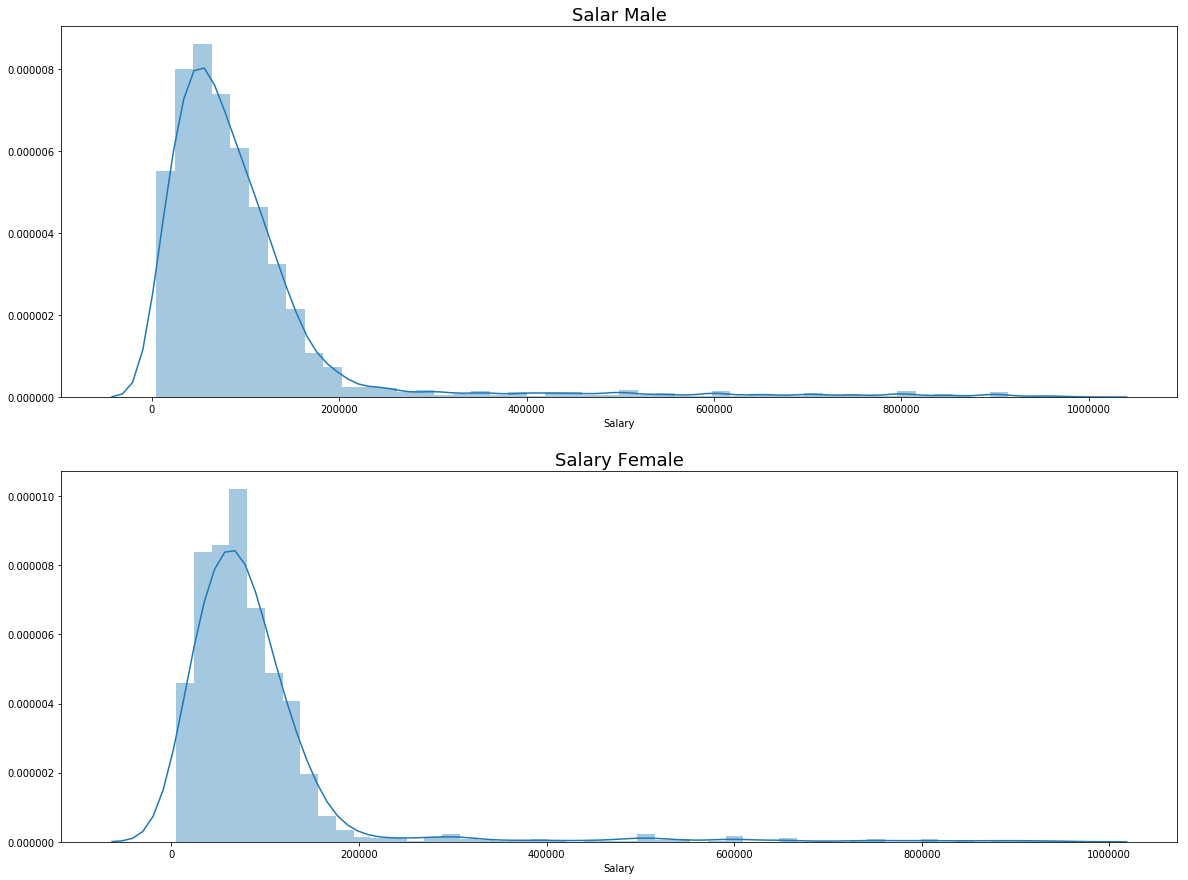

In [270]:
male = countries_data_df[(countries_data_df['Gender'] == 'Male') & (countries_data_df['Salary']>5000) & (data['Salary']<1000000)]
female = countries_data_df[(countries_data_df['Gender'] == 'Female') & (countries_data_df['Salary']>5000) & (data['Salary']<1000000)]
gs = gridspec.GridSpec(2,1)
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(gs[0]) 
sns.distplot(male['Salary'], ax=ax1)

ax2 = fig.add_subplot(gs[1]) 
sns.distplot(female['Salary'], ax=ax2)

ax1.set_title('Salar Male', fontsize=18)
ax2.set_title('Salary Female', fontsize=18)

plt.close(2)
plt.close(3)

In [366]:
male['Salary'].describe()

count     26186.000000
mean     100158.800124
std      120660.620963
min        5001.000000
25%       42000.000000
50%       72000.000000
75%      115000.000000
max      993000.000000
Name: Salary, dtype: float64

In [275]:
female['Salary'].describe()

count      1793.000000
mean      90302.067122
std      102237.863256
min        5200.000000
25%       43000.000000
50%       70000.000000
75%      100000.000000
max      950000.000000
Name: Salary, dtype: float64

##### Findings
M vs F : Male wins in salary with small difference as shown above

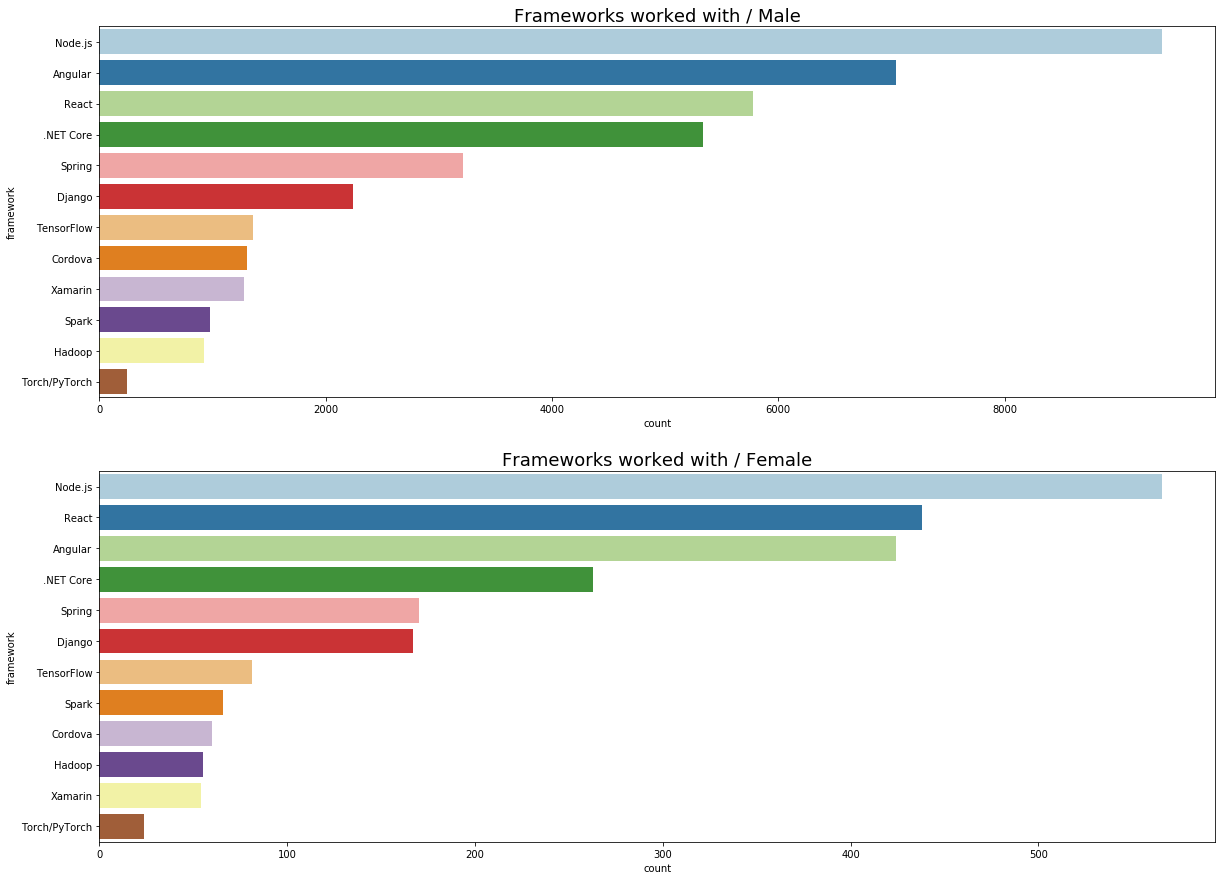

In [301]:
male_frameworks_df = clean_view('FrameworkWorkedWith', 'framework', male).sort_values(by='count', ascending=False)
female_frameworks_df = clean_view('FrameworkWorkedWith', 'framework', female).sort_values(by='count', ascending=False)

gs = gridspec.GridSpec(2,1)
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(gs[0]) 
sns.barplot(x=male_frameworks_df['count'], y=male_frameworks_df['framework'], palette='Paired', ax=ax1)

ax2 = fig.add_subplot(gs[1]) 
sns.barplot(x=female_frameworks_df['count'], y=female_frameworks_df['framework'], palette='Paired', ax=ax2)

ax1.set_title('Frameworks worked with / Male', fontsize=18)
ax2.set_title('Frameworks worked with / Female', fontsize=18)

plt.close(2)
plt.close(3)

### M vs F against Framworks and languages

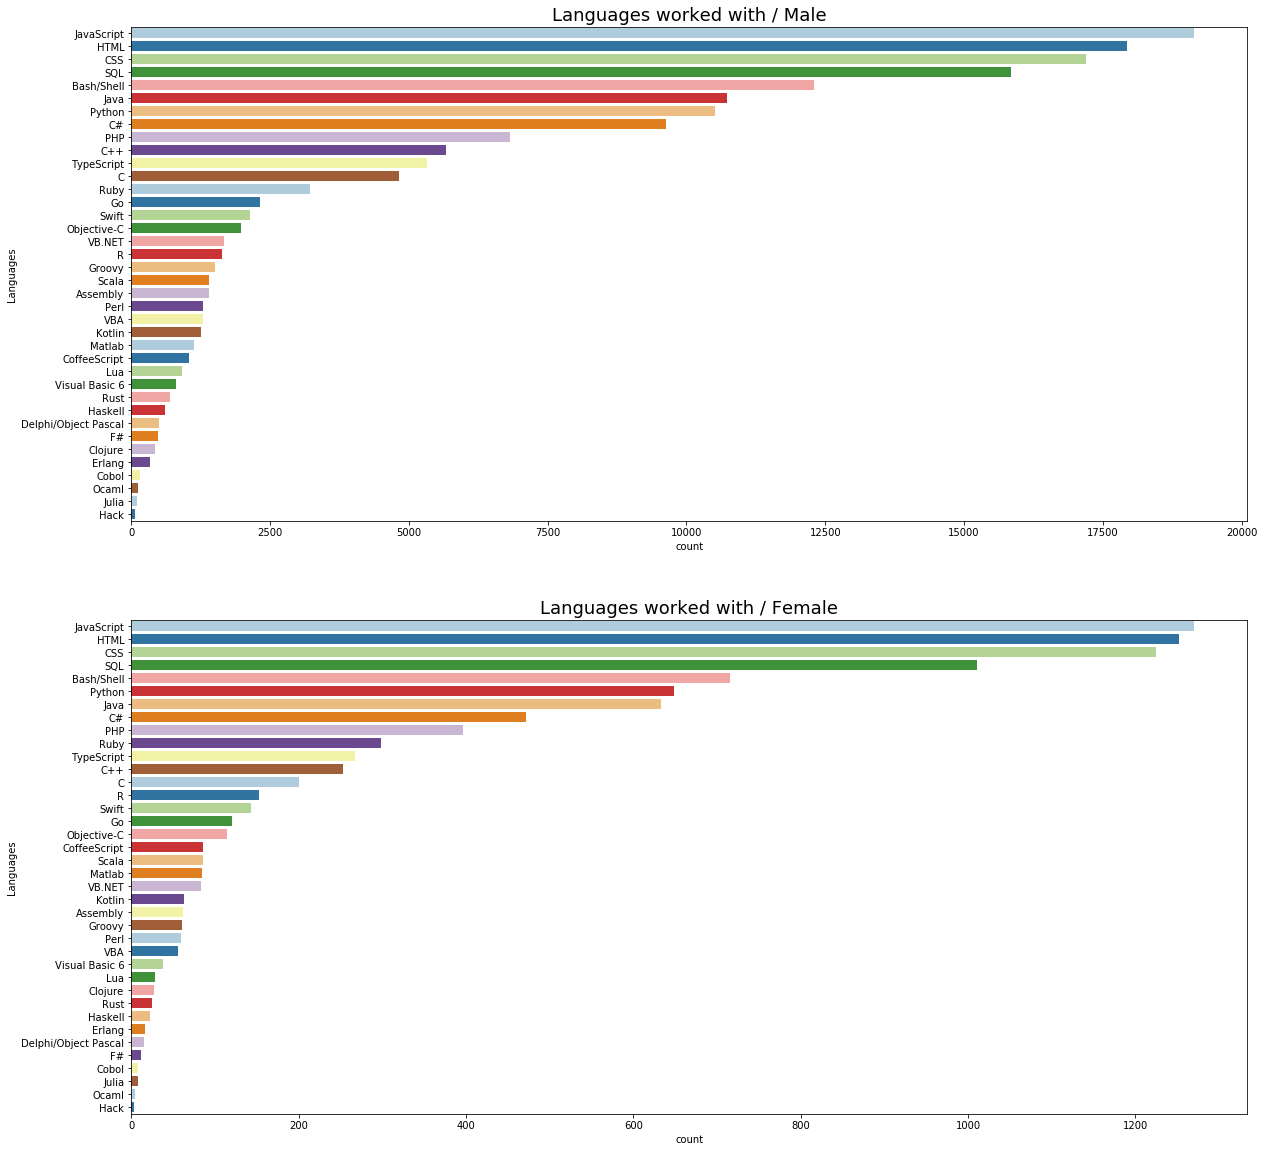

In [299]:
male_lang_df = clean_view('LanguageWorkedWith', 'Languages', male).sort_values(by='count', ascending=False)
female_lang_df = clean_view('LanguageWorkedWith', 'Languages', female).sort_values(by='count', ascending=False)

gs = gridspec.GridSpec(2,1)
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(gs[0]) 
sns.barplot(x=male_lang_df['count'], y=male_lang_df['Languages'], palette='Paired', ax=ax1)

ax2 = fig.add_subplot(gs[1]) 
sns.barplot(x=female_lang_df['count'], y=female_lang_df['Languages'], palette='Paired', ax=ax2)

ax1.set_title('Languages worked with / Male', fontsize=18)
ax2.set_title('Languages worked with / Female', fontsize=18)

plt.close(2)
plt.close(3)

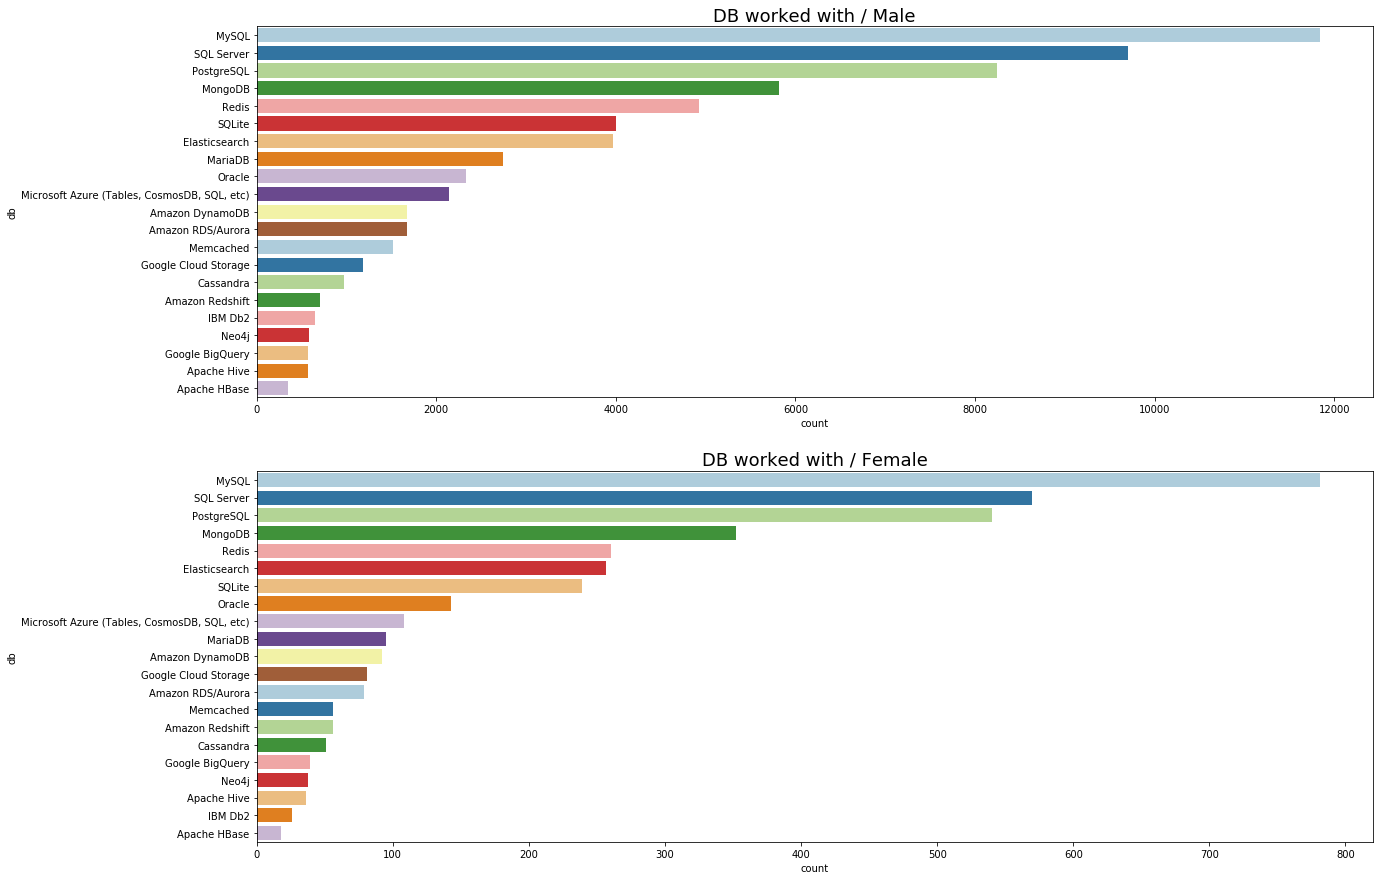

In [296]:
male_db_df = clean_view('DatabaseWorkedWith', 'db', male).sort_values(by='count', ascending=False)
female_db_df = clean_view('DatabaseWorkedWith', 'db', female).sort_values(by='count', ascending=False)

gs = gridspec.GridSpec(2,1)
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(gs[0]) 
sns.barplot(x=male_db_df['count'], y=male_db_df['db'], palette='Paired', ax=ax1)

ax2 = fig.add_subplot(gs[1]) 
sns.barplot(x=female_db_df['count'], y=female_db_df['db'], palette='Paired', ax=ax2)

ax1.set_title('DB worked with / Male', fontsize=18)
ax2.set_title('DB worked with / Female', fontsize=18)

plt.close(2)
plt.close(3)

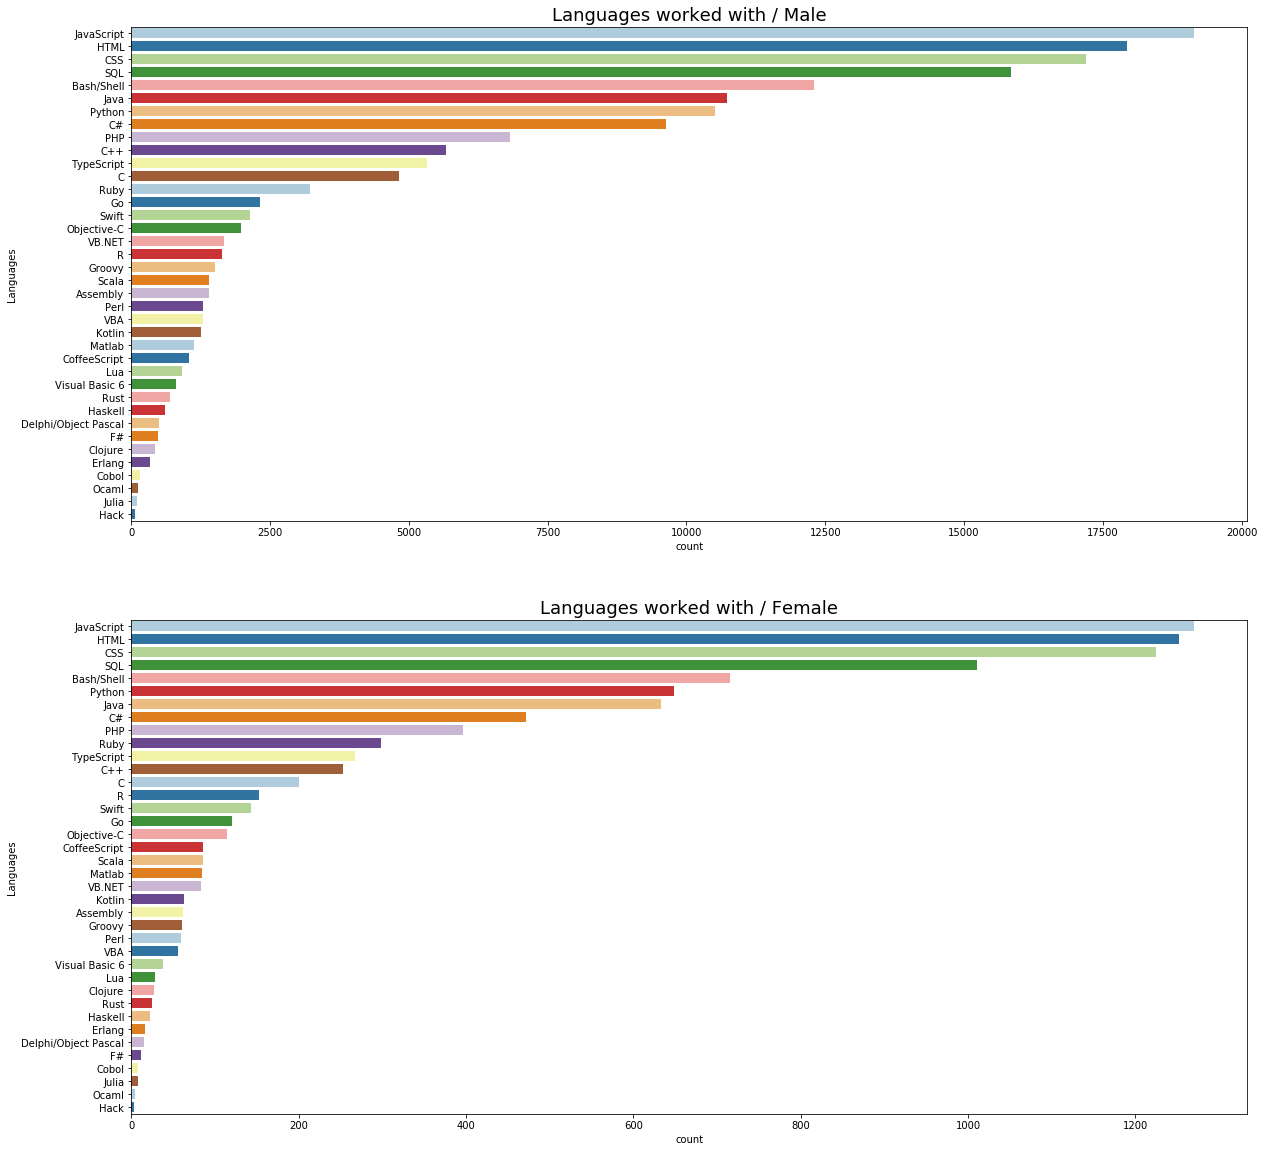

In [317]:
male_lang_df = clean_view('LanguageWorkedWith', 'Languages', male).sort_values(by='count', ascending=False)
female_lang_df = clean_view('LanguageWorkedWith', 'Languages', female).sort_values(by='count', ascending=False)

gs = gridspec.GridSpec(2,1)
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(gs[0]) 
sns.barplot(x=male_lang_df['count'], y=male_lang_df['Languages'], palette='Paired', ax=ax1)

ax2 = fig.add_subplot(gs[1]) 
sns.barplot(x=female_lang_df['count'], y=female_lang_df['Languages'], palette='Paired', ax=ax2)

ax1.set_title('Languages worked with / Male', fontsize=18)
ax2.set_title('Languages worked with / Female', fontsize=18)

plt.close(2)
plt.close(3)

#### Findings
M vs F is mostly equals when it comes to Languages, DB, and framworks choices

### Highest paid role

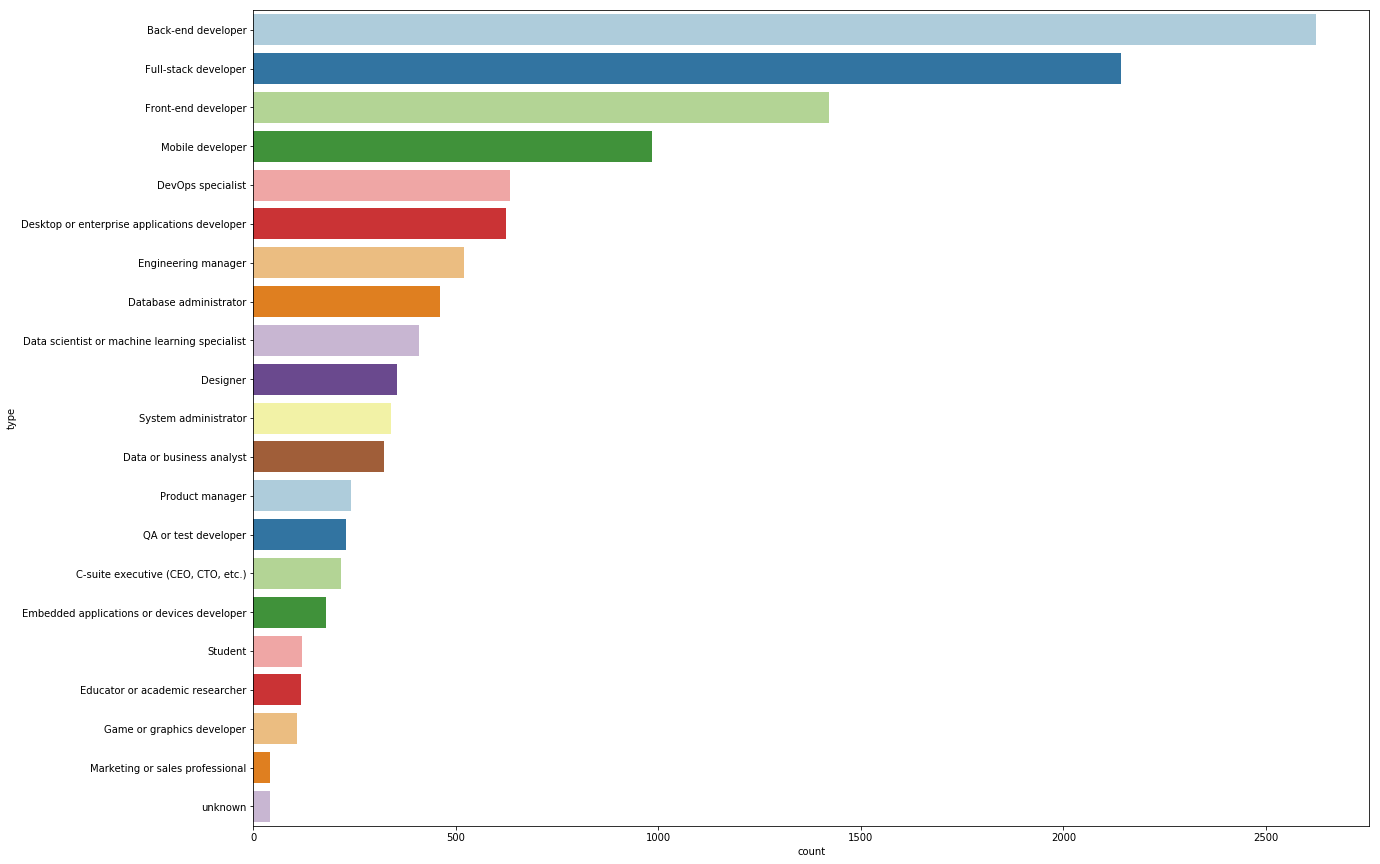

In [315]:
highst_paid_jobs =countries_data_df[countries_data_df['Salary'] > 150000]
highst_paid=clean_view('DevType', 'type', highst_paid_jobs).sort_values(by='count', ascending=False)
plt.figure(figsize=(20,15))
sns.barplot(x=highst_paid['count'], y=highst_paid['type'], palette='Paired')